In [1]:
import numpy as np
import matplotlib.pyplot as plt
datos = np.loadtxt("numeros_20.txt")
training = datos[0:10]
test = datos[10:20]

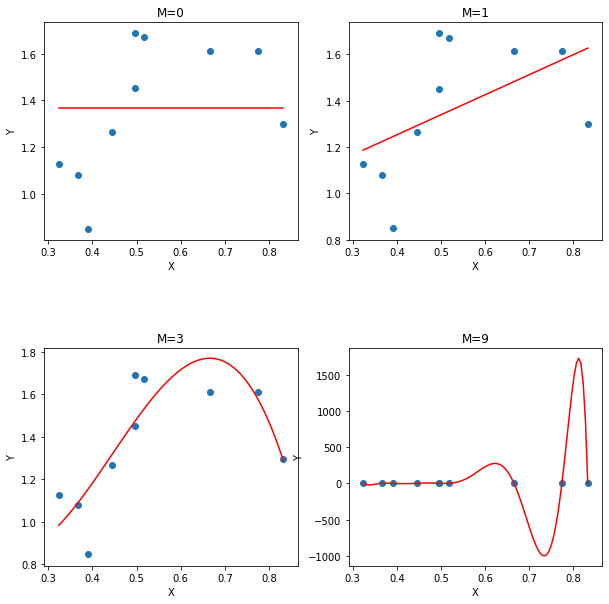

In [2]:
ordenes = range(10)
coeficientes =[]
x = training[:,0]
y = training[:,1]
xtest = test[:,0]
ytest = test[:,1]
xcoef = np.linspace(np.min(x),np.max(x),100)
plt.figure(figsize = (10,10))
contador = 1
for i in range(len(ordenes)):
    matriz = []
    for j in range(10):
        agregar = []
        for k in range(ordenes[i]+1):
            agregar.append(x[j]**k)
        matriz.append(agregar)
    inversa = np.linalg.pinv(matriz)
    producto = np.dot(inversa,y)
    coeficientes.append(producto)
    if(i == 0 or i == 1 or i == 3 or i == 9):
        def f(z):
            ceros = np.zeros(100)
            for l in range(ordenes[i]+1):
                ceros += producto[l]*z**l
            return ceros
        ycoef = f(xcoef)
        plt.subplot(2,2,contador)
        plt.plot(xcoef,ycoef, color = "r")
        plt.scatter(training[:,0],training[:,1])
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("M={}".format(ordenes[i]))
        contador += 1
plt.subplots_adjust(hspace=0.5)
plt.savefig("ajustes.png")

In [5]:
def polinomios(xpol, coef):
    ypol = np.zeros(len(xpol))
    for i in range(len(coef)):
        ypol +=  coef[i] * xpol**i
    return ypol
def E(xpol,ypol,coef):
    resultado = 0
    ymodelo = polinomios(xpol,coef)
    for i in range(len(xpol)):
        resultado += (ymodelo[i]-ypol[i])**2
    return(resultado/2)
def ERMS(x1,y1,w):
    return(np.sqrt(2*E(x1,y1,w)/10))

In [6]:
ErmsTraining = []
ErmsTest = []
for i in range(10):
    ErmsTraining.append(np.log10(ERMS(x,y,coeficientes[i])))
    ErmsTest.append(np.log10(ERMS(xtest,ytest,coeficientes[i])))

Text(0.5, 0, 'M')

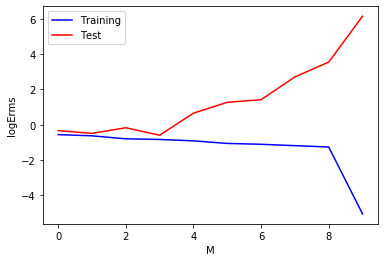

In [12]:
plt.figure()
plt.plot(ordenes, ErmsTraining, label = "Training", color = "b", ls=".")
plt.plot(ordenes, ErmsTest, label = "Test",color = "r")
plt.legend()
plt.ylabel("logErms")
plt.xlabel("M")